In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats 
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
"""Load dataset in a DataFrame"""
df = pd.read_csv(r'../../data/API/jan_2021_to_mar_2022.csv')
df

,match_id,game_mode,match_result,1_antimage,2_axe,3_bane,4_bloodseeker,5_crystal_maiden,6_drow_ranger,7_earthshaker,...,120_pangolier,119_dark_willow,121_grimstroke,129_mars,126_void_spirit,128_snapfire,123_hoodwink,135_dawnbreaker,136_marci,137_primal_beast
0,5858502982,2,1,0,0,0,0,0,0,0,...,1,0,-1,0,-1,0,0,0,0,0
1,5853470032,2,1,0,0,0,0,0,0,0,...,0,0,0,-1,0,0,0,0,0,0
2,5824248643,2,1,0,0,0,0,0,0,1,...,0,0,0,-1,0,0,0,0,0,0
3,5814995665,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5858284957,2,1,0,0,0,0,0,0,1,...,-1,0,0,-1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12835,6467920786,2,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-1,0,0
12836,6469643204,2,-1,0,0,0,0,0,0,0,...,0,0,-1,-1,0,0,0,0,0,0
12837,6474161699,2,-1,0,0,0,0,0,0,0,...,0,0,-1,0,0,-1,0,0,0,0
12838,6477531767,2,-1,1,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0


In [4]:
# check missing data
df.isnull().values.any()

False

In [5]:
# delete cluster_id
df.drop(['match_id'], axis=1, inplace=True)

In [5]:
# sns.set(rc = {'figure.figsize':(5,5)})
# sns.countplot(data=df, x='game_mode')

In [6]:
# sns.set(rc = {'figure.figsize':(5,5)})
# sns.countplot(data=df, x='game_type')

In [6]:
#group1 winning team: 1; gropu2 winning team: -1
group1 = df[df["match_result"] == 1]
group2 = df[df["match_result"] == -1]

In [7]:
group1

,game_mode,match_result,1_antimage,2_axe,3_bane,4_bloodseeker,5_crystal_maiden,6_drow_ranger,7_earthshaker,8_juggernaut,...,120_pangolier,119_dark_willow,121_grimstroke,129_mars,126_void_spirit,128_snapfire,123_hoodwink,135_dawnbreaker,136_marci,137_primal_beast
0,2,1,0,0,0,0,0,0,0,0,...,1,0,-1,0,-1,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0,...,0,0,0,-1,0,0,0,0,0,0
2,2,1,0,0,0,0,0,0,1,1,...,0,0,0,-1,0,0,0,0,0,0
3,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1,0,0,0,0,0,0,1,0,...,-1,0,0,-1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6415,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,-1,1,1,0,0,0
6416,2,1,0,0,0,0,0,1,0,0,...,0,0,0,0,-1,-1,0,0,0,0
6417,2,1,0,0,0,0,0,0,0,0,...,-1,0,0,-1,0,0,0,0,0,0
6418,2,1,0,0,0,-1,0,0,0,-1,...,0,-1,1,0,0,0,1,0,0,0


In [8]:
group2

,game_mode,match_result,1_antimage,2_axe,3_bane,4_bloodseeker,5_crystal_maiden,6_drow_ranger,7_earthshaker,8_juggernaut,...,120_pangolier,119_dark_willow,121_grimstroke,129_mars,126_void_spirit,128_snapfire,123_hoodwink,135_dawnbreaker,136_marci,137_primal_beast
6420,2,-1,0,0,0,-1,1,0,0,0,...,0,0,0,-1,0,0,0,0,0,0
6421,2,-1,0,0,0,0,0,0,0,0,...,0,0,0,-1,0,0,0,0,0,0
6422,1,-1,0,0,0,0,0,0,0,0,...,0,0,0,-1,0,0,0,0,0,0
6423,2,-1,0,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
6424,2,-1,0,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12835,2,-1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-1,0,0
12836,2,-1,0,0,0,0,0,0,0,1,...,0,0,-1,-1,0,0,0,0,0,0
12837,2,-1,0,0,0,0,0,0,0,0,...,0,0,-1,0,0,-1,0,0,0,0
12838,2,-1,1,0,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

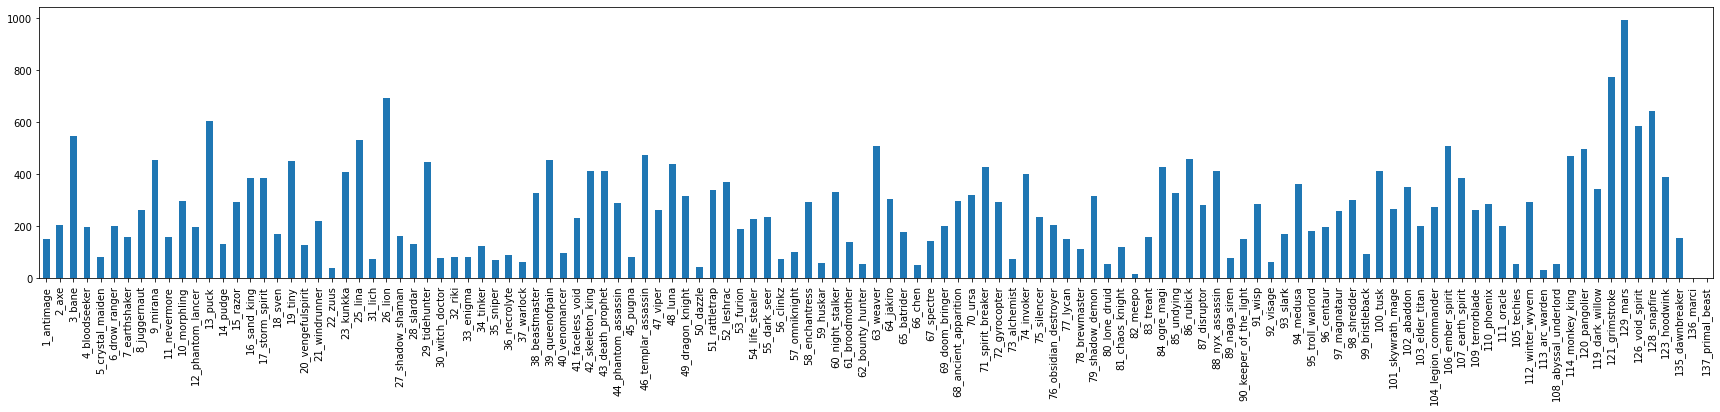

In [10]:
# group1 winning team heroes 
count_group1_winning = group1[group1 == 1].sum(axis=0)[2:]
count_group1_winning.plot.bar(figsize=(30,5))

<AxesSubplot:>

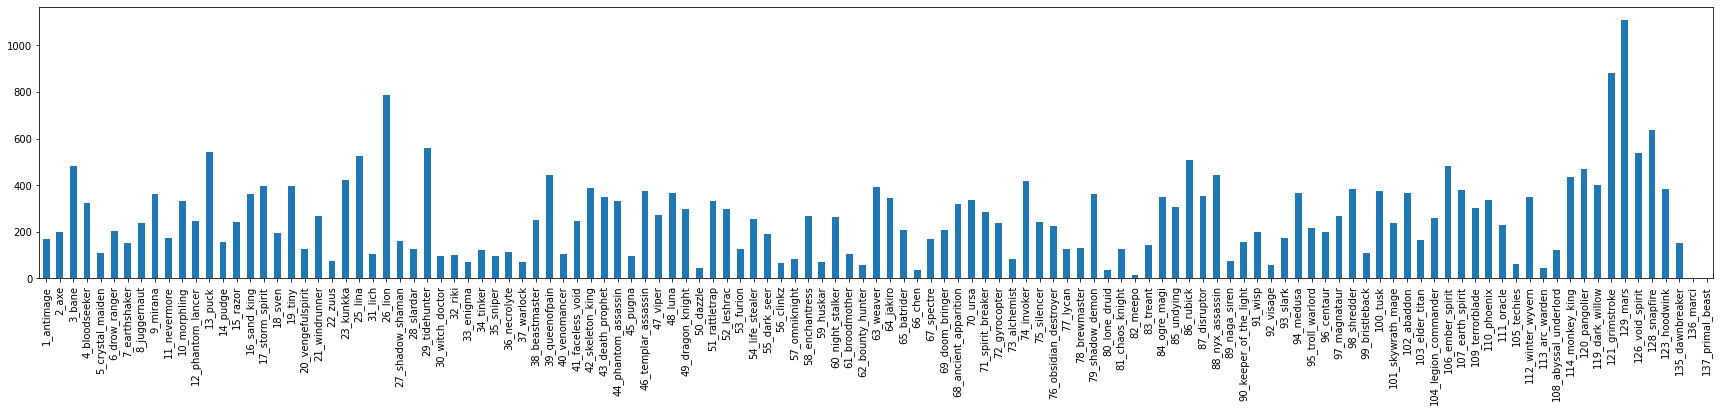

In [11]:
# group1 losing team heroes
count_group1_losing = group1[group1 == -1].sum(axis=0)[2:]
count_group1_losing.abs().plot.bar(figsize=(30,5))

<AxesSubplot:>

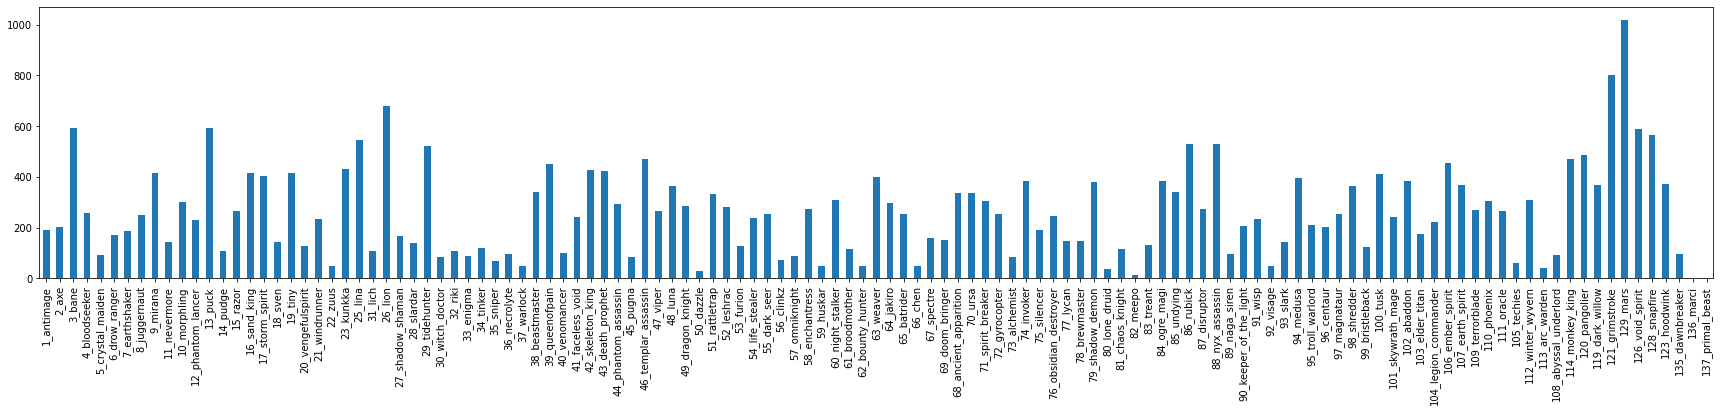

In [12]:
# group2 winning team heroes
count_group2_winning = group2[group2 == -1].sum(axis=0)[2:]
count_group2_winning.abs().plot.bar(figsize=(30,5))

<AxesSubplot:>

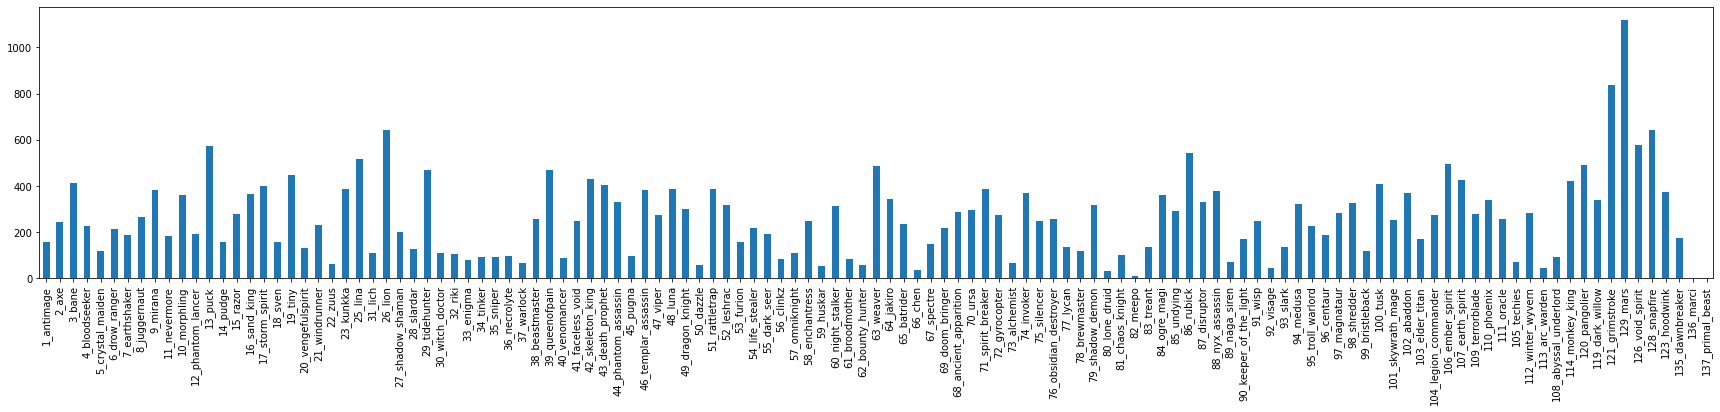

In [13]:
# group2 losing team heroes
count_group2_losing = group2[group2 == 1].sum(axis=0)[2:]
count_group2_losing.plot.bar(figsize=(30,5))

In [14]:
# count all winning 
count_all_winning = count_group1_winning + count_group2_winning.abs()
df_count_all_winning = count_all_winning.to_frame()
df_count_all_winning = df_count_all_winning.rename(columns={0:'Count'})

df_count_all_winning['Percentage'] = df_count_all_winning['Count'] / df_count_all_winning['Count'].sum()
df_count_all_winning


,Count,Percentage
1_antimage,341.0,0.005312
2_axe,410.0,0.006386
3_bane,1139.0,0.017741
4_bloodseeker,454.0,0.007072
5_crystal_maiden,175.0,0.002726
...,...,...
128_snapfire,1209.0,0.018832
123_hoodwink,764.0,0.011900
135_dawnbreaker,252.0,0.003925
136_marci,0.0,0.000000


Text(0.5, 0, 'Heroes')

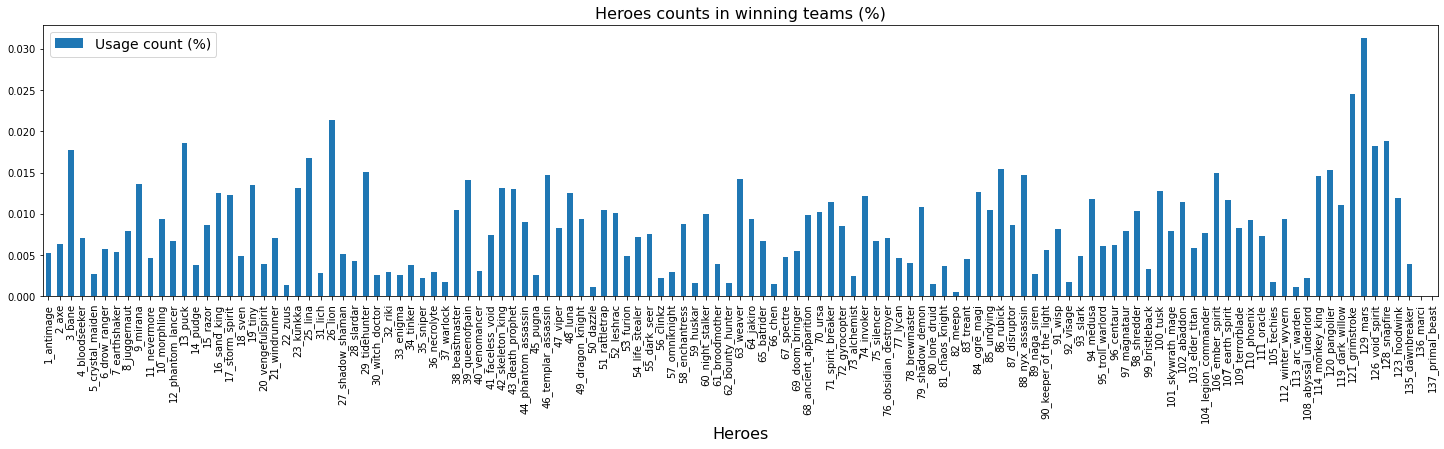

In [15]:
# count all winning - Plot
df_count_all_winning['Percentage'].plot.bar(figsize=(25,5))
plt.title('Heroes counts in winning teams (%)', fontsize=16)
plt.legend(['Usage count (%)'], fontsize=14)
plt.xlabel('Heroes', fontsize=16)

In [16]:
# count all losing - 
count_all_losing = count_group1_losing.abs() + count_group2_losing
df_count_all_losing = count_all_losing.to_frame()
df_count_all_losing = df_count_all_losing.rename(columns={0:'Count'})

df_count_all_losing['Percentage'] = df_count_all_losing['Count'] / df_count_all_losing['Count'].sum()
df_count_all_losing


,Count,Percentage
1_antimage,323.0,0.005031
2_axe,447.0,0.006963
3_bane,895.0,0.013941
4_bloodseeker,551.0,0.008583
5_crystal_maiden,227.0,0.003536
...,...,...
128_snapfire,1279.0,0.019922
123_hoodwink,761.0,0.011854
135_dawnbreaker,330.0,0.005140
136_marci,0.0,0.000000


Text(0.5, 0, 'Heroes')

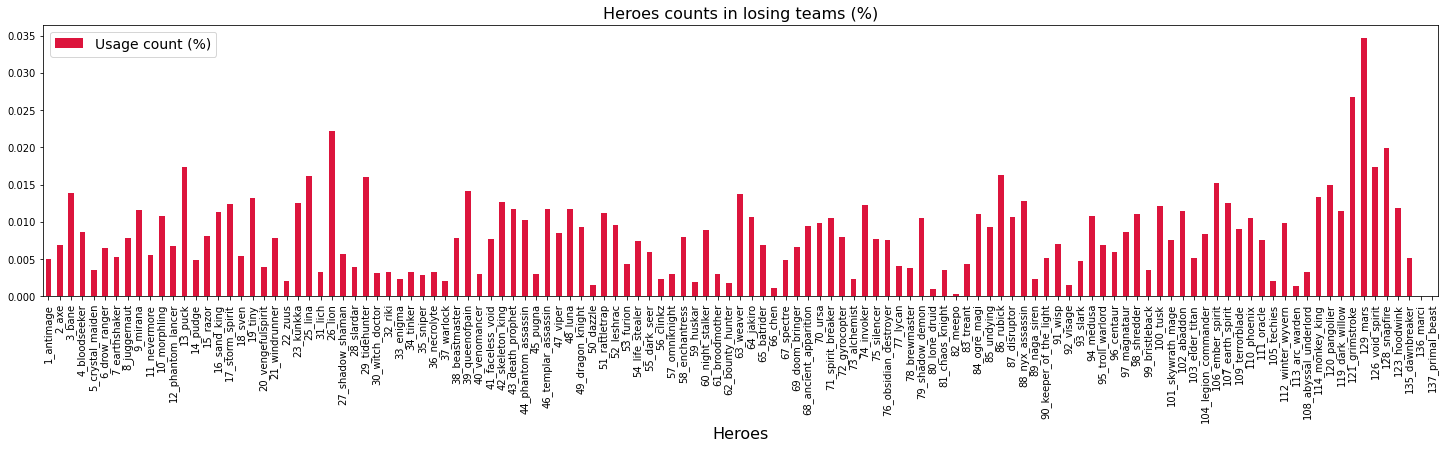

In [17]:
# count all losing - Plot
df_count_all_losing['Percentage'].plot.bar(figsize=(25,5), color='#DC143C')
plt.title('Heroes counts in losing teams (%)', fontsize=16)
plt.legend(['Usage count (%)'], fontsize=14)
plt.xlabel('Heroes', fontsize=16)

In [18]:
#top 10 used heroes between winning and losing (among all groups)
print('winning team heroes counts')
print(count_all_winning.nlargest(n=10))
print('\n')
print('losing team heroes counts')
print(count_all_losing.nlargest(n=10))

winning team heroes counts
129_mars           2014.0
121_grimstroke     1573.0
26_lion            1374.0
128_snapfire       1209.0
13_puck            1195.0
126_void_spirit    1171.0
3_bane             1139.0
25_lina            1077.0
86_rubick           989.0
120_pangolier       981.0
dtype: float64


losing team heroes counts
129_mars            2230.0
121_grimstroke      1719.0
26_lion             1427.0
128_snapfire        1279.0
126_void_spirit     1114.0
13_puck             1113.0
86_rubick           1047.0
25_lina             1039.0
29_tidehunter       1031.0
106_ember_spirit     978.0
dtype: float64


In [19]:
#group1 heroes
group1_heroes = group1.iloc[:,1:124]
group1_heroes

,match_result,1_antimage,2_axe,3_bane,4_bloodseeker,5_crystal_maiden,6_drow_ranger,7_earthshaker,8_juggernaut,9_mirana,...,114_monkey_king,120_pangolier,119_dark_willow,121_grimstroke,129_mars,126_void_spirit,128_snapfire,123_hoodwink,135_dawnbreaker,136_marci
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,-1,0,-1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-1,0,0,0,0,0
2,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,-1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,-1,0,0,-1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6415,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,1,1,0,0
6416,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,-1,-1,0,0,0
6417,1,0,0,0,0,0,0,0,0,1,...,0,-1,0,0,-1,0,0,0,0,0
6418,1,0,0,0,-1,0,0,0,-1,0,...,0,0,-1,1,0,0,0,1,0,0


In [20]:
# group2 heroes
group2_heroes = group2.iloc[:,1:124]
group2_heroes

,match_result,1_antimage,2_axe,3_bane,4_bloodseeker,5_crystal_maiden,6_drow_ranger,7_earthshaker,8_juggernaut,9_mirana,...,114_monkey_king,120_pangolier,119_dark_willow,121_grimstroke,129_mars,126_void_spirit,128_snapfire,123_hoodwink,135_dawnbreaker,136_marci
6420,-1,0,0,0,-1,1,0,0,0,0,...,0,0,0,0,-1,0,0,0,0,0
6421,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-1,0,0,0,0,0
6422,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-1,0,0,0,0,0
6423,-1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
6424,-1,0,0,0,0,0,0,-1,0,0,...,-1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12835,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1,0
12836,-1,0,0,0,0,0,0,0,1,-1,...,0,0,0,-1,-1,0,0,0,0,0
12837,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,-1,0,0,-1,0,0,0
12838,-1,1,0,0,0,0,0,0,0,1,...,0,-1,0,0,0,0,0,0,0,0


In [21]:
# Get winning heroes combination from group1
gp1_winning_heroes = []
for row in range(len(group1_heroes)):
  combination = []
  for col in group1_heroes:
    if group1.iloc[row][col] == 1:
      hero = col
      combination.append(hero)
  gp1_winning_heroes.append(tuple(combination))
print(len(gp1_winning_heroes))


KeyboardInterrupt: 

In [22]:
# Count winning combinations in group1
counts_gp1Combination_win = pd.Series(tuple(gp1_winning_heroes)).value_counts()
print(counts_gp1Combination_win.nlargest(n=10))

(2_axe, 26_lion, 42_skeleton_king, 74_invoker, 102_abaddon)                                3
(19_tiny, 71_spirit_breaker, 91_wisp, 94_medusa, 100_tusk)                                 2
(17_storm_spirit, 26_lion, 54_life_stealer, 98_shredder, 121_grimstroke)                   2
(13_puck, 38_beastmaster, 84_ogre_magi, 94_medusa, 101_skywrath_mage)                      2
(44_phantom_assassin, 58_enchantress, 71_spirit_breaker, 126_void_spirit, 128_snapfire)    2
(1_antimage, 17_storm_spirit, 26_lion, 37_warlock, 98_shredder)                            2
(11_nevermore, 26_lion, 29_tidehunter, 91_wisp, 103_elder_titan)                           2
(35_sniper, 41_faceless_void, 60_night_stalker, 75_silencer, 112_winter_wyvern)            2
(63_weaver, 79_shadow_demon, 107_earth_spirit, 114_monkey_king, 129_mars)                  2
(39_queenofpain, 48_luna, 71_spirit_breaker, 84_ogre_magi, 121_grimstroke)                 2
dtype: int64


In [23]:
# Get winning heroes combination from group2
gp2_winning_heroes =[]
for row in range(len(group2_heroes)):
  combination = []
  for col in group2_heroes:
    if group2.iloc[row][col] == -1:
      hero = col
      combination.append(hero)
  gp2_winning_heroes.append(tuple(combination))

print(len(gp2_winning_heroes))

5896


In [24]:
# Count the winning combinations in group2
counts_gp2Combination_win = pd.Series(gp2_winning_heroes).value_counts()
print(counts_gp2Combination_win.nlargest(n=10))

(19_tiny, 54_life_stealer, 68_ancient_apparition, 86_rubick, 97_magnataur)            3
(49_dragon_knight, 54_life_stealer, 58_enchantress, 74_invoker, 112_winter_wyvern)    2
(44_phantom_assassin, 58_enchantress, 65_batrider, 97_magnataur, 100_tusk)            2
(17_storm_spirit, 42_skeleton_king, 43_death_prophet, 86_rubick, 129_mars)            2
(4_bloodseeker, 13_puck, 28_slardar, 86_rubick, 121_grimstroke)                       2
(26_lion, 77_lycan, 95_troll_warlord, 98_shredder, 110_phoenix)                       2
(9_mirana, 29_tidehunter, 66_chen, 89_naga_siren, 106_ember_spirit)                   2
(17_storm_spirit, 55_dark_seer, 67_spectre, 88_nyx_assassin, 110_phoenix)             2
(13_puck, 26_lion, 85_undying, 109_terrorblade, 129_mars)                             2
(3_bane, 44_phantom_assassin, 86_rubick, 106_ember_spirit, 129_mars)                  2
dtype: int64


In [25]:
# Get losing heroes combination from group1
gp1_losing_heroes =[]
for row in range(len(group1_heroes)):
  combination = []
  for col in group1_heroes:
    if group1.iloc[row][col] == -1:
      hero = col
      combination.append(hero)
  gp1_losing_heroes.append(tuple(combination))

print(len(gp1_losing_heroes))

6490


In [26]:
# Count losing combinations in group1
counts_gp1Combination_lose = pd.Series(gp1_losing_heroes).value_counts()
print(counts_gp1Combination_lose.nlargest(n=10))

(25_lina, 42_skeleton_king, 58_enchantress, 110_phoenix, 120_pangolier)             2
(26_lion, 29_tidehunter, 52_leshrac, 91_wisp, 103_elder_titan)                      2
(26_lion, 48_luna, 102_abaddon, 106_ember_spirit, 129_mars)                         2
(9_mirana, 13_puck, 28_slardar, 99_bristleback, 114_monkey_king)                    2
(16_sand_king, 19_tiny, 119_dark_willow, 121_grimstroke, 126_void_spirit)           2
(4_bloodseeker, 28_slardar, 74_invoker, 114_monkey_king, 128_snapfire)              2
(27_shadow_shaman, 43_death_prophet, 85_undying, 113_arc_warden, 129_mars)          2
(1_antimage, 19_tiny, 64_jakiro, 97_magnataur, 112_winter_wyvern)                   2
(42_skeleton_king, 43_death_prophet, 107_earth_spirit, 121_grimstroke, 129_mars)    2
(5_crystal_maiden, 27_shadow_shaman, 29_tidehunter, 63_weaver, 106_ember_spirit)    2
dtype: int64


In [27]:
# Get losing heroes combination from group2
gp2_losing_heroes =[]
for row in range(len(group2_heroes)):
  combination = []
  for col in group2_heroes:
    if group2.iloc[row][col] == 1:
      hero = col
      combination.append(hero)
  gp2_losing_heroes.append(tuple(combination))

print(len(gp2_losing_heroes))

5896


In [28]:
# Count losing combinations in group2
counts_gp2Combination_lose = pd.Series(gp2_losing_heroes).value_counts()
print(counts_gp2Combination_lose.nlargest(n=10))

(13_puck, 69_doom_bringer, 88_nyx_assassin, 113_arc_warden, 128_snapfire)               3
(13_puck, 25_lina, 54_life_stealer, 61_broodmother, 121_grimstroke)                     3
(46_templar_assassin, 60_night_stalker, 67_spectre, 88_nyx_assassin, 128_snapfire)      2
(2_axe, 6_drow_ranger, 26_lion, 49_dragon_knight, 103_elder_titan)                      2
(9_mirana, 46_templar_assassin, 97_magnataur, 104_legion_commander, 111_oracle)         2
(8_juggernaut, 21_windrunner, 23_kunkka, 27_shadow_shaman, 129_mars)                    2
(26_lion, 48_luna, 107_earth_spirit, 108_abyssal_underlord, 126_void_spirit)            2
(23_kunkka, 30_witch_doctor, 94_medusa, 96_centaur, 119_dark_willow)                    2
(17_storm_spirit, 29_tidehunter, 54_life_stealer, 63_weaver, 87_disruptor)              2
(10_morphling, 76_obsidian_destroyer, 107_earth_spirit, 111_oracle, 126_void_spirit)    2
dtype: int64


In [29]:
# Sum winning combinations from group1 and group2 
combine_group_winning = gp1_winning_heroes + gp2_winning_heroes
counts_combine_group_winning = pd.Series(combine_group_winning).value_counts()
print(counts_combine_group_winning.nlargest(n=10))

(2_axe, 26_lion, 42_skeleton_king, 74_invoker, 102_abaddon)                   4
(19_tiny, 54_life_stealer, 68_ancient_apparition, 86_rubick, 97_magnataur)    3
(19_tiny, 71_spirit_breaker, 91_wisp, 94_medusa, 100_tusk)                    2
(11_nevermore, 26_lion, 29_tidehunter, 91_wisp, 103_elder_titan)              2
(1_antimage, 9_mirana, 29_tidehunter, 52_leshrac, 84_ogre_magi)               2
(44_phantom_assassin, 58_enchantress, 65_batrider, 97_magnataur, 100_tusk)    2
(19_tiny, 51_rattletrap, 52_leshrac, 66_chen, 95_troll_warlord)               2
(39_queenofpain, 48_luna, 71_spirit_breaker, 84_ogre_magi, 121_grimstroke)    2
(25_lina, 48_luna, 49_dragon_knight, 74_invoker, 112_winter_wyvern)           2
(13_puck, 26_lion, 48_luna, 102_abaddon, 120_pangolier)                       2
dtype: int64


In [30]:
# Sum losing combinations from group1 and group2
combine_group_losing = gp1_losing_heroes + gp2_losing_heroes
counts_combine_group_losing = pd.Series(combine_group_losing).value_counts()
print(counts_combine_group_losing.nlargest(n=10))

(13_puck, 25_lina, 54_life_stealer, 61_broodmother, 121_grimstroke)                          3
(13_puck, 69_doom_bringer, 88_nyx_assassin, 113_arc_warden, 128_snapfire)                    3
(2_axe, 6_drow_ranger, 26_lion, 49_dragon_knight, 103_elder_titan)                           2
(17_storm_spirit, 76_obsidian_destroyer, 107_earth_spirit, 109_terrorblade, 128_snapfire)    2
(27_shadow_shaman, 43_death_prophet, 85_undying, 113_arc_warden, 129_mars)                   2
(8_juggernaut, 21_windrunner, 23_kunkka, 27_shadow_shaman, 129_mars)                         2
(25_lina, 42_skeleton_king, 58_enchantress, 110_phoenix, 120_pangolier)                      2
(39_queenofpain, 44_phantom_assassin, 51_rattletrap, 110_phoenix, 129_mars)                  2
(65_batrider, 74_invoker, 91_wisp, 94_medusa, 110_phoenix)                                   2
(9_mirana, 46_templar_assassin, 97_magnataur, 104_legion_commander, 111_oracle)              2
dtype: int64


In [31]:
# Demonstrate counts and percentage of winning team combinations
df_winning_combinations = counts_combine_group_winning.to_frame()
df_winning_combinations  = df_winning_combinations .rename(columns={0:'Count'})

df_winning_combinations ['Percentage'] = (df_winning_combinations ['Count'] / df_winning_combinations ['Count'].sum()) * 100 
df_winning_combinations 


,Count,Percentage
"(2_axe, 26_lion, 42_skeleton_king, 74_invoker, 102_abaddon)",4,0.032295
"(19_tiny, 54_life_stealer, 68_ancient_apparition, 86_rubick, 97_magnataur)",3,0.024221
"(19_tiny, 71_spirit_breaker, 91_wisp, 94_medusa, 100_tusk)",2,0.016147
"(11_nevermore, 26_lion, 29_tidehunter, 91_wisp, 103_elder_titan)",2,0.016147
"(1_antimage, 9_mirana, 29_tidehunter, 52_leshrac, 84_ogre_magi)",2,0.016147
...,...,...
"(16_sand_king, 60_night_stalker, 75_silencer, 86_rubick, 114_monkey_king)",1,0.008074
"(34_tinker, 40_venomancer, 61_broodmother, 80_lone_druid, 120_pangolier)",1,0.008074
"(25_lina, 31_lich, 55_dark_seer, 71_spirit_breaker, 114_monkey_king)",1,0.008074
"(16_sand_king, 25_lina, 60_night_stalker, 70_ursa, 85_undying)",1,0.008074


In [32]:
# Demonstrate counts and percentage of winning team combinations
df_losing_combinations = counts_combine_group_losing.to_frame()
df_losing_combinations  = df_losing_combinations.rename(columns={0:'Count'})

df_losing_combinations['Percentage'] = (df_losing_combinations['Count'] / df_losing_combinations['Count'].sum()) * 100 
df_losing_combinations


,Count,Percentage
"(13_puck, 25_lina, 54_life_stealer, 61_broodmother, 121_grimstroke)",3,0.024221
"(13_puck, 69_doom_bringer, 88_nyx_assassin, 113_arc_warden, 128_snapfire)",3,0.024221
"(2_axe, 6_drow_ranger, 26_lion, 49_dragon_knight, 103_elder_titan)",2,0.016147
"(17_storm_spirit, 76_obsidian_destroyer, 107_earth_spirit, 109_terrorblade, 128_snapfire)",2,0.016147
"(27_shadow_shaman, 43_death_prophet, 85_undying, 113_arc_warden, 129_mars)",2,0.016147
...,...,...
"(25_lina, 38_beastmaster, 44_phantom_assassin, 76_obsidian_destroyer, 135_dawnbreaker)",1,0.008074
"(32_riki, 36_necrolyte, 47_viper, 102_abaddon, 114_monkey_king)",1,0.008074
"(25_lina, 42_skeleton_king, 78_brewmaster, 88_nyx_assassin, 103_elder_titan)",1,0.008074
"(3_bane, 4_bloodseeker, 48_luna, 69_doom_bringer, 103_elder_titan)",1,0.008074


In [38]:
df_winning_combinations['Percentage'].nlargest(n=5).to_frame()


,Percentage
"(2_axe, 26_lion, 42_skeleton_king, 74_invoker, 102_abaddon)",0.032295
"(19_tiny, 54_life_stealer, 68_ancient_apparition, 86_rubick, 97_magnataur)",0.024221
"(19_tiny, 71_spirit_breaker, 91_wisp, 94_medusa, 100_tusk)",0.016147
"(11_nevermore, 26_lion, 29_tidehunter, 91_wisp, 103_elder_titan)",0.016147
"(1_antimage, 9_mirana, 29_tidehunter, 52_leshrac, 84_ogre_magi)",0.016147


In [39]:
df_losing_combinations['Percentage'].nlargest(n=5).to_frame()

,Percentage
"(13_puck, 25_lina, 54_life_stealer, 61_broodmother, 121_grimstroke)",0.024221
"(13_puck, 69_doom_bringer, 88_nyx_assassin, 113_arc_warden, 128_snapfire)",0.024221
"(2_axe, 6_drow_ranger, 26_lion, 49_dragon_knight, 103_elder_titan)",0.016147
"(17_storm_spirit, 76_obsidian_destroyer, 107_earth_spirit, 109_terrorblade, 128_snapfire)",0.016147
"(27_shadow_shaman, 43_death_prophet, 85_undying, 113_arc_warden, 129_mars)",0.016147
